# links

ball tracking with opencv
https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/

object detect from hsv color
https://blog.paralect.com/post/object-detection-image-and-video

opencv tutorial
https://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html

why is the hue range 0 to 180 instead of 360?
https://stackoverflow.com/questions/16685707/why-is-the-range-of-hue-0-180-in-opencv

display opencv image in notebook
https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88



histogram with no outliers
https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting

seaborn swarmplot
https://seaborn.pydata.org/generated/seaborn.swarmplot.html


In [20]:
# For Hue
import numpy as np
import cv2
import math
from imutils.video import VideoStream

# for plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# For Moab
from hat import Hat

In [21]:
hat = Hat()
hat.print_arbitrary_string("Test Hue\nCalibration")
hat.enable_servos()
hat.set_servos(130,130,130)

00001 ┊ 80 54 45 53 54 20 48 55 45 ┊ 00 00 00 00 00 00 00 00 00 ┊ TEST HUE
00002 ┊ 80 0a 43 41 4c 49 42 52 41 ┊ 00 03 00 00 00 00 00 00 00 ┊ ¶CALIBRA
00003 ┊ 80 54 49 4f 4e 00 00 00 00 ┊ 00 03 00 00 00 00 00 00 00 ┊ TION····
00004 ┊ 07 00 00 00 00 00 00 00 00 ┊ 00 03 00 00 00 00 00 00 00
00005 ┊ 01 00 00 00 00 00 00 00 00 ┊ 00 00 00 00 00 00 00 00 00
00006 ┊ 05 32 c8 32 c8 32 c8 00 00 ┊ 00 03 00 00 00 00 00 00 00


In [22]:
cam = cv2.VideoCapture(0)

In [23]:
# sensor native is 4:3; capture at that ratio
w = 384 * 2
h = 288 * 2
assert(math.isclose(w/h, 4/3))

# destination square side 
s = 32 * 4

# will be the upper, left corner of the square, plus M1 bot offsets
x = int((w / 2 - s / 2)) -12
y = int((h / 2 - s / 2)) +4

In [24]:
cam.set(cv2.CAP_PROP_FRAME_WIDTH, w)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, h)
cam.set(cv2.CAP_PROP_FPS, 30)
cam.set(cv2.CAP_PROP_BRIGHTNESS, 60)
cam.set(cv2.CAP_PROP_CONTRAST, 100)

True

In [38]:
def disp(rgb):
    _csv = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(_csv)
    
def disph(hsv):
    _rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(_rgb)

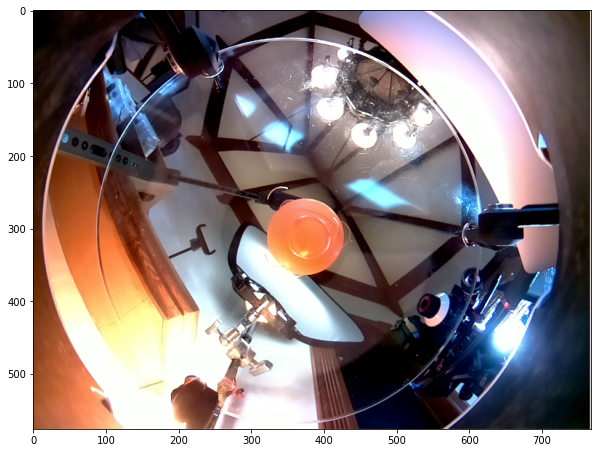

In [26]:
_, img = cam.read()
disp(img)

In [27]:
# convert to HSV for processing
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
cropped = hsv[y:y+s, x:x+s, 0]
print(f"shape = {np.shape(cropped)}")
print(f"mean = {np.mean(cropped)}")
print(f"std. = {np.std(cropped)}")
print(f"std2 = {np.std(cropped, ddof=1)}")


shape = (128, 128)
mean = 26.32452392578125
std. = 47.15690718916346
std2 = 47.15834636964353


(array([[ 68.,   0.,   0., ...,   8.,   2.,   4.],
        [ 68.,   0.,   0., ...,   8.,   2.,   4.],
        [ 70.,   0.,   0., ...,   4.,   4.,   4.],
        ...,
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.],
        [128.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <a list of 128 BarContainer objects>)

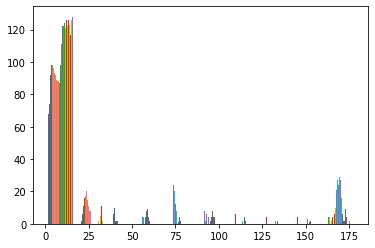

In [12]:
filtered = cropped[~is_outlier(cropped)]
plt.hist(filtered)

In [100]:
df = pd.DataFrame(filtered)
df

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,11,11,11,11,9,9,9,9,9,9,...,7,7,9,9,9,9,6,6,6,6
1,11,11,11,11,9,9,9,9,9,9,...,7,7,9,9,9,9,6,6,6,6
2,11,11,11,11,10,10,8,8,11,11,...,7,7,9,9,8,8,7,7,7,7
3,11,11,11,11,10,10,8,8,11,11,...,7,7,9,9,8,8,7,7,7,7
4,12,12,11,11,10,10,12,12,11,11,...,6,6,9,9,8,8,8,8,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,4,4,4,4,3,3,3,3,5,5,...,8,8,8,8,8,8,8,8,7,7
100,5,5,5,5,4,4,4,4,5,5,...,7,7,8,8,8,8,7,7,6,6
101,5,5,5,5,4,4,4,4,5,5,...,7,7,8,8,8,8,7,7,6,6
102,1,1,4,4,3,3,4,4,4,4,...,7,7,7,7,7,7,7,7,7,7


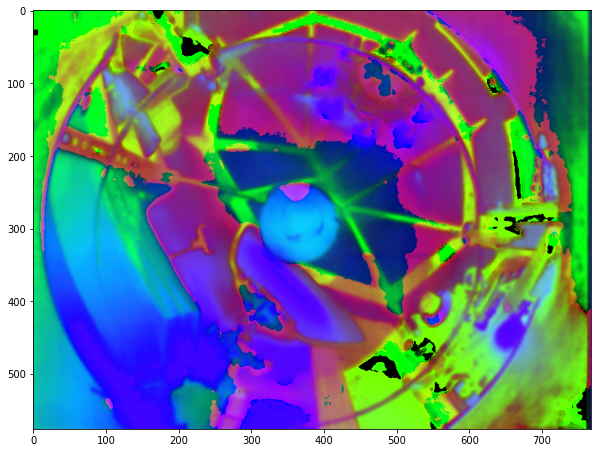

In [13]:
lower = np.array([5, 100, 50])
upper = np.array([30, 255, 255])

blurred = cv2.GaussianBlur(img, (11,11), 0)
mask = cv2.inRange(hsv, lower, upper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(10,10))
plt.imshow(hsv)

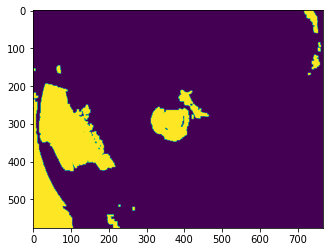

In [14]:
plt.imshow(mask)

In [15]:
maskgray = cv2.cvtColor(mask, cv2.COLOR
                       )
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)

AttributeError: module 'cv2.cv2' has no attribute 'COLOR'

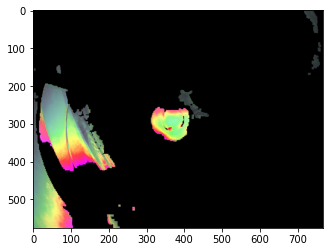

In [16]:
result = cv2.bitwise_and(img, img, mask=mask)
result_hsv = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
plt.imshow(result_hsv)

In [17]:
hat.lower()
hat.disable_servos()
del(cam)

00007 ┊ 05 3c 8c 3c 8c 3c 8c 00 00 ┊ 00 03 00 00 00 00 00 00 00
00008 ┊ 02 00 00 00 00 00 00 00 00 ┊ 00 03 00 00 00 00 00 00 00


In [44]:
np.shape(img_rgb)

(288, 384, 3)

In [37]:
original = img.copy()

mask = cv2.inRange(hsv, lower, upper)

In [11]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [18]:
from sklearn.cluster import KMeans
from collections import Counter
import cv2 #for resizing image

def get_dominant_color(image, k=4, image_processing_size = None):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input

    >>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
    [56.2423442, 34.0834233, 70.1234123]
    """
    #resize image if new dims provided
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size, 
                            interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    return list(dominant_color)


In [19]:
i = np.zeros((50,50,3), np.uint8)
i[:] = (120/2, 100, 50)
disph(i)


NameError: name 'disph' is not defined

In [28]:
get_dominant_color(img)

[27.336208006148, 20.51301468806018, 30.87563106939953]

In [33]:
ballcolor = get_dominant_color(hsv[y:y+s, x:x+s])[0]
print(ballcolor)

9.555121474789402


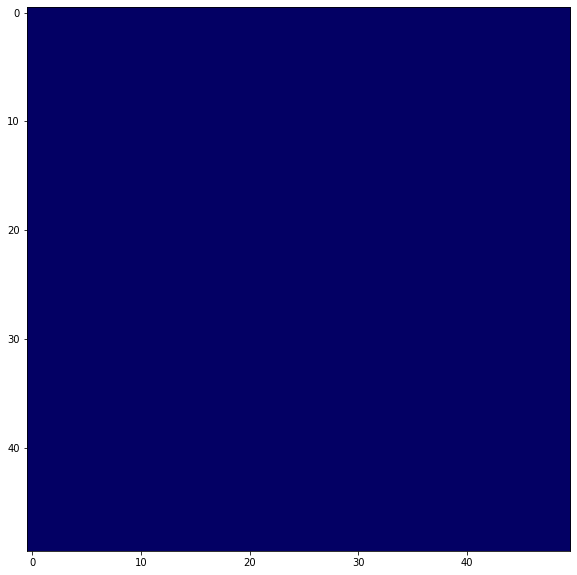

In [70]:
i = np.zeros((50,50,3), np.uint8)
i[:] = (359//2, 255, 100)

temp = cv2.cvtColor(i, cv2.COLOR_HSV2BGR)
plt.figure(figsize=(10,10))
plt.imshow(temp)